# Текст про нарды

In [ ]:
t = '/text.txt'
text = open(t).read()
text

'Backgammon is one of the oldest known board games. Its history can be traced back nearly 5,000 years to archeological discoveries in the Middle East. It is a two player game where each player has fifteen checkers which move between twenty-four points according to the roll of two dice.'

# 1. Токенизация по предложениям

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
st = nltk.sent_tokenize(text)
st

['Backgammon is one of the oldest known board games.',
 'Its history can be traced back nearly 5,000 years to archeological discoveries in the Middle East.',
 'It is a two player game where each player has fifteen checkers which move between twenty-four points according to the roll of two dice.']

# 2. Токенизация по словам

In [ ]:
wt = []
for i in range(len(st)):
  wt.append(nltk.word_tokenize(st[i]))
for i in wt:
  print(i)

['Backgammon', 'is', 'one', 'of', 'the', 'oldest', 'known', 'board', 'games', '.']
['Its', 'history', 'can', 'be', 'traced', 'back', 'nearly', '5,000', 'years', 'to', 'archeological', 'discoveries', 'in', 'the', 'Middle', 'East', '.']
['It', 'is', 'a', 'two', 'player', 'game', 'where', 'each', 'player', 'has', 'fifteen', 'checkers', 'which', 'move', 'between', 'twenty-four', 'points', 'according', 'to', 'the', 'roll', 'of', 'two', 'dice', '.']


# 3. Лемматизация текста

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
for i in wt:
  # print(i)
  # print(nltk.pos_tag(i))
  for t in i:
    # print(t)
    lem = lemmatizer.lemmatize(t, get_wordnet_pos(t))
    print(f'{t} => {lem}')
    

Backgammon => Backgammon
is => be
one => one
of => of
the => the
oldest => old
known => know
board => board
games => game
. => .
Its => Its
history => history
can => can
be => be
traced => trace
back => back
nearly => nearly
5,000 => 5,000
years => year
to => to
archeological => archeological
discoveries => discovery
in => in
the => the
Middle => Middle
East => East
. => .
It => It
is => be
a => a
two => two
player => player
game => game
where => where
each => each
player => player
has => have
fifteen => fifteen
checkers => checker
which => which
move => move
between => between
twenty-four => twenty-four
points => point
according => accord
to => to
the => the
roll => roll
of => of
two => two
dice => dice
. => .


# 4. Мешок слов

In [ ]:
st

['Backgammon is one of the oldest known board games.',
 'Its history can be traced back nearly 5,000 years to archeological discoveries in the Middle East.',
 'It is a two player game where each player has fifteen checkers which move between twenty-four points according to the roll of two dice.']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(st)
V = vectorizer.get_feature_names_out()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
Table = pd.DataFrame(X.toarray(), columns = V)
Table.head()

,000,according,archeological,back,backgammon,be,between,board,can,checkers,dice,discoveries,each,east,fifteen,four,game,games,has,history,in,is,it,its,known,middle,move,nearly,of,oldest,one,player,points,roll,the,to,traced,twenty,two,where,which,years
0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0
1,1,0,1,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1
2,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,2,1,1,1,1,0,1,2,1,1,0


# WordCloud

In [ ]:
from wordcloud import WordCloud
wc = WordCloud()
wc.generate(text)
wc.to_file("/output.png")

# Другое

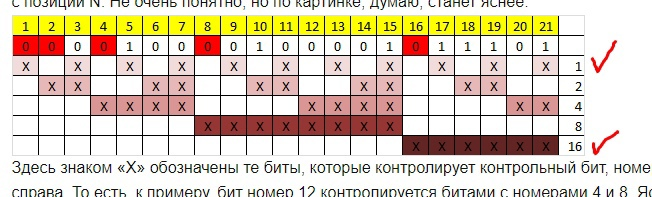

In [ ]:
List = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
l = List[::2]
l

[1, 3, 5, 7, 9, 11, 13, 15]

In [ ]:
l2 = List[1:]
# print(l2)
r2=[]
for i in range(0,len(l2),4):
  r2 += l2[i:i+2]
print(r2)

[2, 3, 6, 7, 10, 11, 14, 15]


In [ ]:
l4 = List[3:]
# print(l4)
r4=[]
for i in range(0,len(l4),8):
  r4 += l4[i:i+4]
print(r4)

[4, 5, 6, 7, 12, 13, 14, 15]


In [ ]:
l8 = List[7:]
# print(l4)
r8=[]
for i in range(0,len(l8),16):
  r8 += l8[i:i+8]
print(r8)

[8, 9, 10, 11, 12, 13, 14, 15]
